In [ ]:
!apt-get install x11-utils > /dev/null 2>&1 


In [ ]:
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
!pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
  Running setup.py install for box2d-py ... done
  DEPRECATION: box2d-py was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https:

In [ ]:
python gym/envs/box2d/lunar_lander.py

SyntaxError: ignored

In [2]:
import gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay


In [3]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

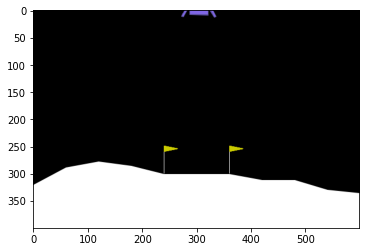

In [4]:
list = []
env = gym.make("LunarLander-v2")
env.reset()
sum_reward = 0;
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)
Q = []
r = []
n = 5
for i in range(n):
  obs_space = env.reset() #initial state by reset
  action = env.action_space.sample() #random action
  new_obs, reward, done, info = env.step(action) #new state, reward
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
 
  sum_reward += reward #sum of the reward for each iteration
  list.append(obs_space)
  list.append(action)
  list.append(new_obs)
  r.append(reward)
  list.append(sum_reward)
  if done:
    break
   
ipythondisplay.clear_output(wait=True)
env.close()

In [9]:
Qf = []
x = sum_reward
for i in range(n):
  if i == n-1:
    break
  if i < 1:
    Qf.append(x) 
  x -= r[i]
  Qf.append(x) 
print(Qf)

[-1.0947691776232904, 1.2020945896343418, 2.224579740917433, 3.2198809351882134, 0.5146656133332228]


In [6]:
print(r)

[-2.296863767257632, -1.0224851512830913, -0.9953011942707803, 2.7052153218549906, 0.5146656133332226]


In [7]:
sum(r) #sum

-1.0947691776232904

In [8]:
Q = sum_reward #sum
Q

-1.0947691776232904

In [10]:
list

[array([-0.00428696,  1.4032488 , -0.43423396, -0.34095135,  0.00497426,
         0.09836034,  0.        ,  0.        ], dtype=float32),
 1,
 array([-0.00866127,  1.3950117 , -0.44456777, -0.36613378,  0.01202376,
         0.14100435,  0.        ,  0.        ], dtype=float32),
 -2.296863767257632,
 array([ 0.00203829,  1.4011714 ,  0.20644578, -0.43327245, -0.00235511,
        -0.046763  ,  0.        ,  0.        ], dtype=float32),
 1,
 array([ 0.00400162,  1.3908347 ,  0.19676557, -0.45940983, -0.00278097,
        -0.00851715,  0.        ,  0.        ], dtype=float32),
 -3.3193489185407232,
 array([-0.00685205,  1.4049432 , -0.694047  , -0.2656687 ,  0.00794653,
         0.15721196,  0.        ,  0.        ], dtype=float32),
 0,
 array([-0.01370459,  1.3983899 , -0.6931093 , -0.29132178,  0.01571492,
         0.15538326,  0.        ,  0.        ], dtype=float32),
 -4.314650112811504,
 array([-3.1023024e-04,  1.4012612e+00, -3.1439621e-02, -4.2928237e-01,
         3.6628329e-04,  7.121

In [ ]:
var = 0
for i in range(1,n): #R2
  var += r[i]
var

-74.26350937305072

In [ ]:
var = 0 
for i in range(2,n):   #R3
  var += r[i]
var 

-73.1271204522429

In [ ]:
var = 0
for i in range(3,n):   #R4
  var += r[i]
var  

-70.79853314664113

In [ ]:
display.stop()